## Bag of Words(BoW)

### Basic

In [1]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)
    
    word_to_index = {}
    bow = []
    
    for word in tokenized_document:        
        if word not in word_to_index.keys():  # 단어가 처음 나왔을 경우
            word_to_index[word] = len(word_to_index)  
            bow.insert(len(word_to_index) - 1, 1)
        else:                                 # 단어가 다시 나왔을 경우
            index = word_to_index.get(word)
            print(word, type(word_to_index))
            bow[index] = bow[index] + 1
                    
    return word_to_index, bow
    
    
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

가 <class 'dict'>
물가상승률 <class 'dict'>
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [2]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

을 <class 'dict'>
vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [3]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)

print('vocabulary :', vocab)
print('bag of words vector :', bow)

가 <class 'dict'>
물가상승률 <class 'dict'>
소비자 <class 'dict'>
하는 <class 'dict'>
물가상승률 <class 'dict'>
을 <class 'dict'>
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### BOW-CountVectorizer 

In [4]:
# CountVectorizer : 띄어쓰기만으로 토큰화 진행
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 빈도수 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 단어의 인덱스
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### BOW-불용어 제거(countvectorizer 이용 사용자 정의 불용어)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [6]:
# 사용자정의 불용어 적용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### BOW-불용어 제거(CountVectorizer 포함된 불용어)

In [7]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


### BOW-불용어 제거(NLTK 포함된 불용어)

In [8]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")

vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## 문서 단어 행렬(Document-Term Matrix, DTM)

### 데이터 다운로드

In [9]:
# colab : wget -c https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx

In [10]:
# !pip install wget

In [11]:
# windows일 경우
import wget

wget.download('https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx')

'imdb (2).xlsx'

### 데이터 열기

In [12]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0)

In [13]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [14]:
df.shape

(748, 2)

### TDM 만들기

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# max_features : 빈도순으로 최대 500단어까지 포함
# stop_words='english' : 불용어(관사, 전치사등을 제거)
cv = CountVectorizer(max_features=500, stop_words='english')

In [16]:
tdm = cv.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [17]:
tdm.shape

(748, 500)

### 단어 목록

In [ ]:
# 단어 목록을 볼때는 tdm이 아니라 cv에 저장되어 있음
cv.get_feature_names()[:10]

In [ ]:
len(cv.get_feature_names())

500

### 단어별 총 빈도

In [ ]:
tdm.sum(axis=0) # 칼럼을 보자! => numpy는 df과 반대로 0이 칼럼, 1이 행

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [ ]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [ ]:
word_count

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3
...,...,...
495,wrong,3
496,year,5
497,years,14
498,yes,3


In [ ]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


#### 2.6 단어 빈도 저장

In [ ]:
word_count.to_csv('word_count.csv', encoding='cp949')

## 3. 단어 구름(wordcloud)

#### 3.1 wordcloud 설치

In [ ]:
# 아나콘다를 이용할 경우:
# ! conda install -y -c conda-forge wordcloud
# 맥 또는 리눅스에서는 pip 명령어로 설치
# ! pip install wordcloud

In [ ]:
import pandas as pd

word_count = pd.read_csv('word_count.csv', index_col=0)
word_count.head()

## 3.3 단어 구름

In [ ]:
from wordcloud import WordCloud
#font_path: 글꼴의 경로
#max_words: 워드클라우드를 그릴 단어의 개수
#background_color: 배경색 설정
#width : 가로크기(픽셀 단위)
#height: 세로크기(픽셀 단위)
#배경은 흰색, 최대 100단어를 가로 400픽셀, 세로 300픽셀 크기로 단어 구름으로 그린다.
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)

In [ ]:
word_count.set_index('단어')['빈도']

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [ ]:
# dictionary로 만드는 방법 1
count_dic = word_count.set_index('단어')['빈도'].to_dict()
count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [ ]:
# dictionary로 만드는 방법 2
dict(zip(word_count['단어'], word_count['빈도']))

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [ ]:
cloud = wc.fit_words(count_dic)

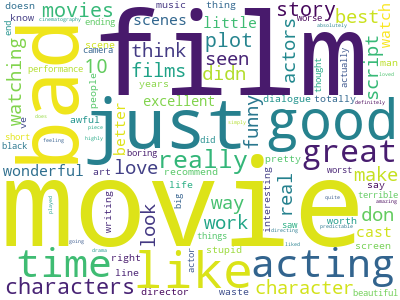

In [ ]:
cloud.to_image()

In [ ]:
cloud.to_file('cloud.png')

In [ ]:
import os
os.getcwd()

'c:\\Users\\hanna\\workspace\\data\\class_221027'

## TF-IDF

#### 4.1 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # 주피터 노트북 쉘 모드에서 알파멧 l을 누르면, 라인이 생겼다 없어졌다 함

tfidf = TfidfVectorizer(max_features=500, stop_words='english')

In [ ]:
tdm = tfidf.fit_transform(df['review'])

In [ ]:
print(tdm)

  (0, 264)	0.43676152065842583
  (0, 499)	0.5112421488050499
  (0, 284)	0.23148088751652843
  (0, 286)	0.5112421488050499
  (0, 385)	0.48261672511123166
  (1, 185)	0.4508252485652821
  (1, 27)	0.4630757536620436
  (1, 61)	0.330043211383874
  (1, 253)	0.4775650258680224
  (1, 417)	0.4952984618525245
  (2, 293)	0.3326996842333155
  (2, 242)	0.30667834544717537
  (2, 319)	0.24142314513946203
  (2, 321)	0.3140711939059074
  (2, 5)	0.22041303500891976
  (2, 354)	0.32260561111952785
  (2, 108)	0.3140711939059074
  (2, 54)	0.2890474338764623
  (2, 71)	0.32260561111952785
  (2, 475)	0.30015739096222105
  (2, 43)	0.2943241984036562
  (2, 284)	0.15064019733663225
  (3, 394)	0.6747516922530598
  (3, 287)	0.5316526285937699
  (3, 244)	0.5119137000618044
  :	:
  (739, 146)	1.0
  (740, 9)	0.83021432552157
  (740, 182)	0.5574443234070687
  (741, 250)	0.6167137686897145
  (741, 481)	0.4797072301038725
  (741, 405)	0.4694360111750707
  (741, 239)	0.41130880407139175
  (742, 284)	1.0
  (743, 46)	0.59810

In [ ]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head(5)

c:\Users\hanna\.conda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


## 5. 기존TDM에서 변환

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500, stop_words='english')
tdm2 = cv.fit_transform(df['review'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

trans = TfidfTransformer()
tdm3 = trans.fit_transform(tdm2)
tdm3

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [ ]:
# tf-idf 두 방법 비교
import numpy as np

np.allclose(tdm.A, tdm3.A)

True

In [ ]:
wc2 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    'tf-idf' : tdm3.sum(axis=0).flat
})

wc2.sort_values('tf-idf', ascending=False).head()

c:\Users\hanna\.conda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


## 6. 영어품사 태깅 & 표제어 추출

In [ ]:
# !conda install -y -c conda-forge spacy # spacy 라이브러리 설치

In [ ]:
# !python -m spacy download en_core_web_sm # 영어 모형 다운로드

In [ ]:
# ! pip install -U spacy # 임포트 오류 시 업데이트 적용

In [ ]:
# ! python -m spacy download en # 여전히 오류 날 때 적용

In [ ]:
import spacy
# 영어 모형 불러오기
nlp = spacy.load("en_core_web_sm")
# 모형에 영어 텍스트 적용
text = "Wikipedia is maintained by volunteers."
doc = nlp(text)

c:\Users\hanna\.conda\envs\study\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
for token in doc:
    print(token.text,
          token.lemma_,  # 표제어
          token.pos_,    # 단어의 품사
          token.tag_,    # 자세한 품사
          token.dep_,    # 문법적 의존 관계
          token.is_stop) # 불용어 여부

Wikipedia Wikipedia PROPN NNP nsubjpass False
is be AUX VBZ auxpass True
maintained maintain VERB VBN ROOT False
by by ADP IN agent True
volunteers volunteer NOUN NNS pobj False
. . PUNCT . punct False


In [ ]:
spacy.explain('PROPN')

'proper noun'

In [ ]:
# 명사와 동사의 표제어로 단어 문서 행렬 만들기
def extract_nv(text):
    doc = nlp(text)
    words = []
    for token in doc:
        print(token.tag_)
        if token.tag_[0] in 'NV':
            words.append(token.lemma_.lower())
    return words

In [ ]:
extract_nv('Apple is a company')

NNP
VBZ
DT
NN


['apple', 'be', 'company']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, tokenizer=extract_nv)

In [ ]:
# 데이터를 불러온다.
import pandas as pd
df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
# TDM을 만든다.
tdm = cv.fit_transform(df['review'])

DT
RB
,
JJ
,
RB
RB
HYPH
VBG
,
JJ
NN
IN
DT
JJ
,
VBG
JJ
NN
.
_SP
RB
JJ
WP
VBD
RBR
VBN
:
DT
JJ
NNS
CC
DT
NN
,
RB
NN
IN
WP
VBD
RP
.
_SP
VBG
NN
IN
JJ
CC
JJ
CC
JJ
NN
NNS
,
DT
NN
VBN
,
VBD
RB
RBR
JJ
:
IN
DT
NN
VBD
JJ
CC
DT
NN
CC
NNS
RB
JJ
JJ
JJ
.
_SP
RB
JJ
NN
CC
NN
TO
VB
IN
.
_SP
DT
JJS
NN
IN
DT
NN
VBD
WRB
NNP
VBZ
VBG
TO
VB
DT
NN
WDT
VBZ
VBG
IN
PRP$
NN
.
_SP
DT
NN
IN
DT
NN
VBZ
NN
,
NN
,
VBG
NFP
IN
PRP
VBZ
IN
NN
,
PRP
VBZ
PRP
VBP
IN
PRP
VBZ
JJ
.
_SP
VBD
CD
NNS
.
_SP
VBD
DT
NN
NN
CC
VBD
PRP
VBD
DT
JJ
NN
,
JJ
NNS
IN
NNS
.
_SP
DT
NN
JJ
.
_SP
VBD
DT
NN
IN
NNP
NNP
IN
DT
NN
NN
.
_SP
CC
DT
NN
NNS
VBD
JJ
.
_SP
DT
NN
VBD
DT
NN
IN
NNP
IN
PRP
VBZ
JJS
,
VBD
PRP
VB
RB
JJ
.
_SP
DT
NNS
VBD
DT
JJS
CC
DT
NNS
VBD
RB
JJ
.
_SP
PRP
VBD
RB
JJ
.
_SP
DT
VBZ
DT
RB
``
JJ
IN
NN
''
NN
WDT
VBZ
NN
RB
RB
IN
PRP$
NN
.
_SP
PRP
VBD
DT
JJ
NN
IN
DT
JJ
NN
,
CC
PRP
VBD
DT
JJ
NN
IN
PRP
RB
MD
VB
.
_SP
DT
NN
VBZ
RB
JJ
,
IN
PRP
VBP
DT
NN
IN
CD
NNS
TO
VB
DT
JJ
JJS
NN
RB
VBD
.
_SP
PRP
MD
VB
DT
NN
RP
IN
DT
NN
IN
NNS
IN
NN
,
NN
,
NN
,
NN


In [ ]:
# 빈도 순으로 정렬
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

c:\Users\hanna\.conda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
wc.sort_values('빈도', ascending=False).head(10)

,단어,빈도
28,be,845
263,movie,211
126,film,189
166,have,119
92,do,112
370,see,78
49,character,59
233,make,58
478,watch,48
446,time,48
